# Development of Emotion and Reasoning in the General Speeches of the United Nations: A text-based machine learning approach
## Additional Analysis: Different individualised Stopwords & Different Calculation of Weigthed Frequencies - Figures

Ensure that all scripts from the notebook folder and Additional Analysis ran before hand.

### Description: 
#### This file creates the following figures

Result Figures
- Emotionaliy over time (Overall) vs. Emotionality over time (Ind. Stopwords) vs. Emotionality over time (Different Calculation of Weighted Frequencies)

In [44]:
# == Import libraries for data processing and visualization ==
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import os
import joblib
import pandas as pd
from matplotlib.lines import Line2D
import textwrap

In [48]:
# --- Set base path to project root ---
base_path = Path.cwd().parents[1]  # project root
print(f"Project root set to: {base_path}")

data_c = base_path / "data"
data_results = data_c / 'results'
fig_dir = base_path / 'fig'

Project root set to: C:\Users\sarah\Downloads\TESTRUN


In [35]:
# === Load data ===
os.chdir(data_results)
un_corpus_scored = pd.read_csv(
    os.path.join(data_results, "un_corpus_scored.csv"),
    sep=';', 
    encoding='utf-8'
)

ind_stopwords_un_corpus_scored = pd.read_csv(
    os.path.join(data_results, "ind_stopwords_un_corpus_scored.csv"),
    sep=';', 
    encoding='utf-8'
)

removed_lowfreq_words_un_corpus_scored = pd.read_csv(
    os.path.join(data_results, "removed_lowfreq_words_un_corpus_scored.csv"),
    sep=';', 
    encoding='utf-8'
)

In [37]:
# == Define Global Plotting Settings ===

FIGSIZE = (12, 6)
LINEWIDTH = 2
MARKER = None

# Grid style
GRID_STYLE = "whitegrid"
sns.set_style(GRID_STYLE)

# X-axis ticks
TICK_YEARS = [1946] + list(range(1950, 2025, 5))
if 2024 not in TICK_YEARS:
    TICK_YEARS.append(2024)
XTICK_ROTATION = 45

# Font sizes
AXIS_LABEL_FONT_SIZE = 14     
TICK_LABEL_FONT_SIZE = 14      
LEGEND_FONT_SIZE = 12         

# Tick Settings 
TICK_LENGTH = 5
TICK_WIDTH = 2
TICK_COLOR = 'black'
TICK_DIRECTION = 'out'

# Y-axis range for primary axis (y1)
Y_RANGE_EMOTIONALITY = (0.5, 1.1)

# Y-axis for second axis (y2)
AX_SET_YLIM = 0
AX_SET_Y_MARGIN = 0
SECOND_Y_AXIS_BOTTOM = 0

# Spines & Grid Lines
SPINE_COLOR = 'darkgrey'
SPINE_WIDTH = 1.5
GRID_COLOR = 'darkgrey'
GRID_WIDTH = 1.0


# Legend settings
LEGEND_LOC = "upper center"
LEGEND_BBOX = (0.5, -0.15)
LEGEND_NCOL = 3     

# Layout
TIGHT_LAYOUT_RECT = [0, 0, 1, 1]

# Despine options
DESPINE_SETTINGS = dict(left=True, right=True, top=True, bottom=False)

# Note
FIG_NOTE_FONT = dict(ha='center', fontsize=14, fontstyle='italic')

# Color Palette
CUSTOM_COLORS = ['#004260', '#50822E', '#f2c80c',
                 #'#F69B2D', 
                 '#E4003A', '#D95F02']

### Figure: Emotionality over time

C:\Users\sarah\AppData\Local\Temp\ipykernel_8688\1184476357.py:19: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

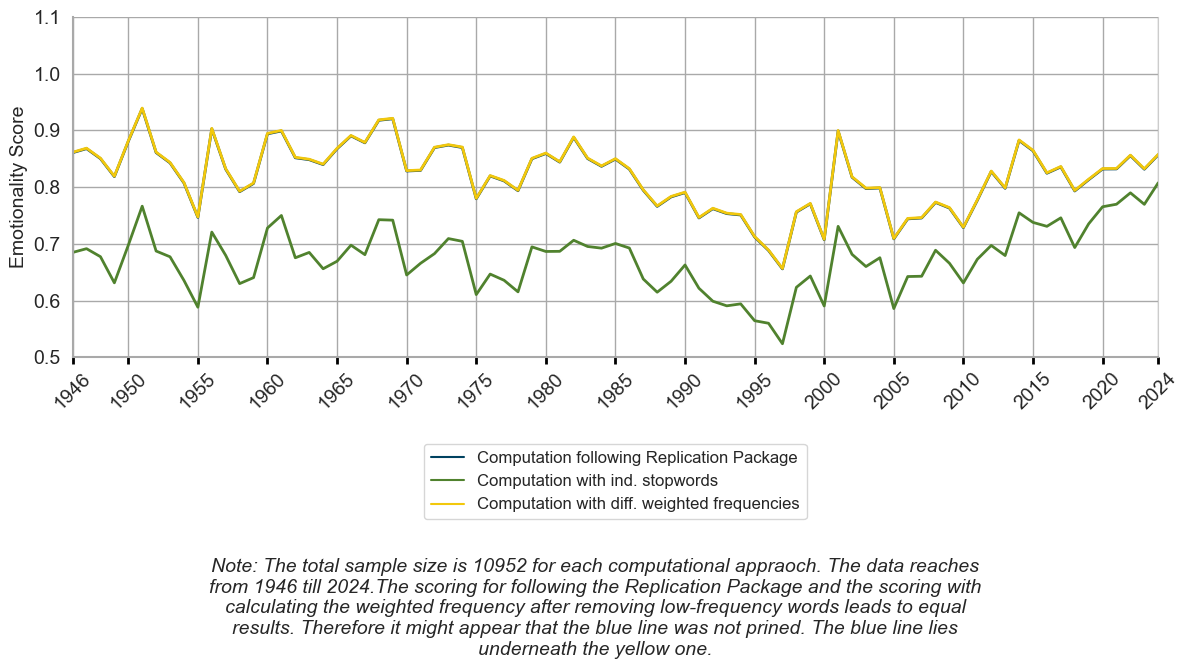

In [106]:
avg_un = un_corpus_scored.groupby("year")["score"].mean()
avg_stop = ind_stopwords_un_corpus_scored.groupby("year")["score"].mean()
avg_low = removed_lowfreq_words_un_corpus_scored.groupby("year")["score"].mean()

df_plot = pd.DataFrame({
    "year": avg_un.index,
    "Computation following Replication Package": avg_un.values,
    "Computation with ind. stopwords": avg_stop.values,
    "Computation with diff. weighted frequencies": avg_low.values
})

df_plot_long = df_plot.melt(id_vars="year", var_name="dataset", value_name="emotionality")


# === PLOT ===
fig, ax1 = plt.subplots(figsize=FIGSIZE)

sns.lineplot(
    data=df_plot_long,
    x="year",
    y="emotionality",
    hue="dataset",
    palette=CUSTOM_COLORS,
    linewidth=LINEWIDTH,
    ax=ax1
)

ax1.set_ylabel("Emotionality Score", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_xlabel("")

ax1.tick_params(
    axis='y',
    direction=TICK_DIRECTION,
    length=TICK_LENGTH,
    width=TICK_WIDTH,
    color=TICK_COLOR,
    labelsize=TICK_LABEL_FONT_SIZE
)
ax1.tick_params(
    axis='x',
    which='both',
    bottom=True,
    top=False,
    direction=TICK_DIRECTION,
    length=TICK_LENGTH,
    width=TICK_WIDTH,
    color=TICK_COLOR,
    labelsize=TICK_LABEL_FONT_SIZE
)


ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
sns.despine(left=False, right=False, top=True, bottom=False)

ax1.set_xlim(1946, 2024)
ax1.set_ylim(Y_RANGE_EMOTIONALITY)

ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

ax1.legend(
    title=None,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.5),     
    ncol=1,
    fontsize=LEGEND_FONT_SIZE,
    title_fontsize=LEGEND_FONT_SIZE
)

note_text = (
    f"Note: The total sample size is 10952 for each computational appraoch. "
    f"The data reaches from 1946 till 2024."
    f"The scoring following the Replication Package and the scoring with calculating the weighted frequency after removing low-frequency words leads to equal results. Therefore it might appear that the blue line was not prined. The blue line lies underneath the yellow one. "
)
wrapped_text = "\n".join(textwrap.wrap(note_text, width=90))
plt.figtext(0.5, -0.1, wrapped_text, **FIG_NOTE_FONT) 

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_comparison.png'), bbox_inches='tight')
plt.show()